# DataProcessor.ipynb

## 2020 언어병리

언어병리 프로젝트에 소스가 되는 데이터를 전처리합니다.

In [1]:
BOS_TAG = '^'
EOS_TAG = '$'
MORPH_BOUNDARY = '@'
PHONO_BOUNDARY = ' '
SYL_BOUNDARY = '~'
EMPTY_CODA = '#'

## hgtk

[hgtk](https://github.com/bluedisk/hangul-toolkit)을 사용하여 자소분리를 시행합니다.

In [2]:
! pip install hgtk

In [3]:
import hgtk

## Load Data

**ipynb 경로에 data 디렉토리를 생성 후, 데이터 파일을 넣고 실행해 주세요.**

In [4]:
import os

import pandas as pd

In [5]:
os.chdir("data")

In [6]:
#엑셀이 관리 불편, 파일 기껏해야 200-300개임 -> 노가다 해서 텍스트로 바꾸기 -> (텍스트 처리로 바꾸기)
# 읽기1 읽기2는 합치기

def read_from_excel(path):
    print(f"Loading {path}")
    xls_file = pd.ExcelFile(path)
    dfs = []
    df = pd.DataFrame()
    for idx, name in enumerate(xls_file.sheet_names):
        print(f"Reading sheet {name}")
        sheet = xls_file.parse(name, skiprows = 4, header=None, dtype = str)
        try:
            sheet.columns = ["Data #", "발화의 전체 지속시간", "지속시간/비유창성", "지속시간/250ms이상 쉼", "지속시간/2초 이상의 쉼 쉼의 지속시간-2", "유창한 발화의 지속시간", "유창하게 산출한 음절 수", "Articulation Rate", "발화의 내용전달 음절 수", "Overall Speaking Rate", "발화유형", "비유창성 유형", "발화", "형태소수", "T-unit수", "etc."]
        except ValueError:
            sheet.columns = ["Data #", "발화의 전체 지속시간", "지속시간/비유창성", "지속시간/250ms이상 쉼", "지속시간/ ", "유창한 발화의 지속시간", "유창하게 산출한 음절 수", "Articulation Rate", "발화의 내용전달 음절 수", "Overall Speaking Rate", "발화유형", "비유창성 유형", "구문복잡성", "etc."]
        df = df.append(sheet, ignore_index = True)
        dfs.append(df)
    return dfs

In [7]:
utterances = []
dirs = os.listdir()
print(dirs)
for dir in dirs:
    for df in read_from_excel(dir):
        try:
            for utterance in df["발화"].values.tolist():
                utterances.append(utterance)
        except KeyError:
            for utterance in df["구문복잡성"].values.tolist():
                utterances.append(utterance)
utterances = [x for x in utterances if str(x) != "nan"]
os.chdir("..")

['A021KJH.xls', 'A004PSH.xls', 'A013KJH.xls', 'A018KHJ.xls', 'A016NYS.xls']
Loading A021KJH.xls
Reading sheet 읽기1
Reading sheet 읽기2
Reading sheet 그림
Loading A004PSH.xls
Reading sheet 읽기1
Reading sheet 읽기2
Reading sheet 그림
Loading A013KJH.xls
Reading sheet 읽기1
Reading sheet 읽기2
Reading sheet 그림
Loading A018KHJ.xls
Reading sheet 읽기1
Reading sheet 읽기2
Reading sheet 그림
Loading A016NYS.xls
Reading sheet 읽기1
Reading sheet 읽기2
Reading sheet 그림


In [8]:
for utterance in utterances:
    print(utterance)

DP안녕하세요 선생님 
DP이번 여름은 DP유난히 더워서 여름이 DP언제 가나 DP했었지요
그런데 벌써 요 며칠은 아침 저녁으로 부는 바람이 다릅니다 
저녁도 일찍 찾아들고 정말 DP가을이 성큼 DP가까이 온 것 DP같습니다 
지난 봄에 선생님을 뵈었는데 DP이제야 편지를 씁니다 
DP선생님을 기다리는 동안 어떤 모습DP이실지 무척 DP궁금했는데 DP선생님께선 DP예전 모습 그대로셨습니다 
목소리도 DP여전하시구요 
DP선생님 때론 DP거울같고 때론 DP회초리같은 선생님으로 DP오래오래 교단에 DP계셨으면 좋겠습니다 
DP어떻게들 DP사느냐고 물으셨지요 
마음을 나눌 사람은 DP찾았는지 
지역사회를 위해 뭔가 하고 있는지 
마음은 평화로운지 
최대한 DP인간답게 DP살려고 애쓰고 R2있DP있는지 
저는 모리 선생님이 던진 이 질문들에 네 그렇습니다라고 답할 수 DP있었으면 DP합니다
R1a사실 Ha사실 DP아직은 자신있게 말하기 DP어렵습니다 
DP하지만 잠들기 전 오늘 하루도 잘 보냈구나하고 차분히 정리할 수 있다면 그 땐 가능성이 R2이있는 DP것이겠지요 
선생님 내내 DP건강하세요 
DP해가 바뀌기 전에 다시 친구들과 찾아 뵙겠습니다 
학교는 어떤 모습일지 벌써 DP소풍을 앞둔 DP아이처럼 마음이 설레입니다
DP안녕하세요 선생님 
DP이번 여름은 DP유난히 더워서 여름이 DP언제 가나 DP했었지요
그런데 벌써 요 며칠은 아침 저녁으로 부는 바람이 다릅니다 
저녁도 일찍 찾아들고 정말 DP가을이 성큼 DP가까이 온 것 DP같습니다 
지난 봄에 선생님을 뵈었는데 DP이제야 편지를 씁니다 
DP선생님을 기다리는 동안 어떤 모습DP이실지 무척 DP궁금했는데 DP선생님께선 DP예전 모습 그대로셨습니다 
목소리도 DP여전하시구요 
DP선생님 때론 DP거울같고 때론 DP회초리같은 선생님으로 DP오래오래 교단에 DP계셨으면 좋겠습니다 
DP어떻게들 DP사느냐고 물으셨지요 
마음을 나눌 사람은 DP찾았는지 
지역사회를 위해 뭔가 하고 있는지 
마음은 평화로운지 
최대한 

## 음절 단위로 쪼개기

In [9]:
import re

def syllabify(utterances):
    syllabified_utterances = []

    for utterance in utterances:
        temp = ""
        result = ""
        utterance = BOS_TAG + utterance
        for char in utterance:
            if hgtk.checker.is_hangul(char):
                if bool(re.match(r"^\w+", temp)):
                    result += " " + temp
                else:
                    result += temp
                temp = ""
                result += PHONO_BOUNDARY
                result += char
            elif char == " ":
                result += temp
                temp = ""
                result += " " + MORPH_BOUNDARY
            else:
                temp += char
        REGEX_FOR_INITIAL_SPACE = re.compile(rf"([\^{re.escape(MORPH_BOUNDARY)}])(\w)")
        result = re.sub(REGEX_FOR_INITIAL_SPACE, r"\1 \2", result)
        syllabified_utterances.append(result + " " + EOS_TAG)

    return syllabified_utterances

syllabify(utterances)
# 1. 전처리 문장 맨 끝에는 음절 끝이랑 스페이스 지우기
# 2. 숫자 전부 지우기(수작업으로 지우기)
# 3. 문장 부호 다 지우기
# 4. 숫자도 읽는 방식으로 만들기(수작업) -> 이천이년(2002년) -> 유월과 육월의 차이의 경우 일반적인 기준으로 작성
# 5. 스터터링 코드 뒤에는 무조건 공백이 나올 수 있게 만들기

['^ DP 안 녕 하 세 요 @ 선 생 님 @ $',
 '^ DP 이 번 @ 여 름 은 @ DP 유 난 히 @ 더 워 서 @ 여 름 이 @ DP 언 제 @ 가 나 @ DP 했 었 지 요 $',
 '^ 그 런 데 @ 벌 써 @ 요 @ 며 칠 은 @ 아 침 @ 저 녁 으 로 @ 부 는 @ 바 람 이 @ 다 릅 니 다 @ $',
 '^ 저 녁 도 @ 일 찍 @ 찾 아 들 고 @ 정 말 @ DP 가 을 이 @ 성 큼 @ DP 가 까 이 @ 온 @ 것 @ DP 같 습 니 다 @ $',
 '^ 지 난 @ 봄 에 @ 선 생 님 을 @ 뵈 었 는 데 @ DP 이 제 야 @ 편 지 를 @ 씁 니 다 @ $',
 '^ DP 선 생 님 을 @ 기 다 리 는 @ 동 안 @ 어 떤 @ 모 습 DP 이 실 지 @ 무 척 @ DP 궁 금 했 는 데 @ DP 선 생 님 께 선 @ DP 예 전 @ 모 습 @ 그 대 로 셨 습 니 다 @ $',
 '^ 목 소 리 도 @ DP 여 전 하 시 구 요 @ $',
 '^ DP 선 생 님 @ 때 론 @ DP 거 울 같 고 @ 때 론 @ DP 회 초 리 같 은 @ 선 생 님 으 로 @ DP 오 래 오 래 @ 교 단 에 @ DP 계 셨 으 면 @ 좋 겠 습 니 다 @ $',
 '^ DP 어 떻 게 들 @ DP 사 느 냐 고 @ 물 으 셨 지 요 @ $',
 '^ 마 음 을 @ 나 눌 @ 사 람 은 @ DP 찾 았 는 지 @ $',
 '^ 지 역 사 회 를 @ 위 해 @ 뭔 가 @ 하 고 @ 있 는 지 @ $',
 '^ 마 음 은 @ 평 화 로 운 지 @ $',
 '^ 최 대 한 @ DP 인 간 답 게 @ DP 살 려 고 @ 애 쓰 고 @ R2 있 DP 있 는 지 @ $',
 '^ 저 는 @ 모 리 @ 선 생 님 이 @ 던 진 @ 이 @ 질 문 들 에 @ 네 @ 그 렇 습 니 다 라 고 @ 답 할 @ 수 @ DP 있 었 으 면 @ DP 합 니 다 $',
 '^ R1a 사 실 @ Ha 사 실 @ DP 아 직 은 @ 자 신 있 게 @ 말 하 기 @ DP 어 

## 음소 단위로 쪼개기

In [10]:
import re

def phonemicize(utterances):
    phonemicized_utterances = []

    for utterance in utterances:
        temp = ""
        result = ""
        utterance = BOS_TAG + utterance
        for char in utterance:
            if hgtk.checker.is_hangul(char):
                if bool(re.match(r"^\w+", temp)):
                    result += " " + temp
                else:
                    result += temp
                temp = ""
    #            result += PHONO_BOUNDARY
                separated = hgtk.letter.decompose(char)
                for s in separated:
                    if s == '':
                        s = EMPTY_CODA
                    result += s
                    result += PHONO_BOUNDARY
            elif char == " ":
                result += temp
                temp = ""
                result += MORPH_BOUNDARY
            else:
                temp += char
        REGEX_FOR_INITIAL_SPACE = re.compile(rf"([\^{re.escape(MORPH_BOUNDARY)}])(\w)")
        result = re.sub(REGEX_FOR_INITIAL_SPACE, r"\1 \2", result)
        phonemicized_utterances.append(result + " " + EOS_TAG)

    return phonemicized_utterances

phonemicize(utterances)

# 1. 스터터링 코드 다음에 공백
# 2. 문장 맨 앞뒤로 스트리핑
# 3. 음절경계 ~로 표기

['^ DPㅇ ㅏ ㄴ ㄴ ㅕ ㅇ ㅎ ㅏ # ㅅ ㅔ # ㅇ ㅛ # @ ㅅ ㅓ ㄴ ㅅ ㅐ ㅇ ㄴ ㅣ ㅁ @ $',
 '^ DPㅇ ㅣ # ㅂ ㅓ ㄴ @ ㅇ ㅕ # ㄹ ㅡ ㅁ ㅇ ㅡ ㄴ @ DPㅇ ㅠ # ㄴ ㅏ ㄴ ㅎ ㅣ # @ ㄷ ㅓ # ㅇ ㅝ # ㅅ ㅓ # @ ㅇ ㅕ # ㄹ ㅡ ㅁ ㅇ ㅣ # @ DPㅇ ㅓ ㄴ ㅈ ㅔ # @ ㄱ ㅏ # ㄴ ㅏ # @ DPㅎ ㅐ ㅆ ㅇ ㅓ ㅆ ㅈ ㅣ # ㅇ ㅛ #  $',
 '^ ㄱ ㅡ # ㄹ ㅓ ㄴ ㄷ ㅔ # @ ㅂ ㅓ ㄹ ㅆ ㅓ # @ ㅇ ㅛ # @ ㅁ ㅕ # ㅊ ㅣ ㄹ ㅇ ㅡ ㄴ @ ㅇ ㅏ # ㅊ ㅣ ㅁ @ ㅈ ㅓ # ㄴ ㅕ ㄱ ㅇ ㅡ # ㄹ ㅗ # @ ㅂ ㅜ # ㄴ ㅡ ㄴ @ ㅂ ㅏ # ㄹ ㅏ ㅁ ㅇ ㅣ # @ ㄷ ㅏ # ㄹ ㅡ ㅂ ㄴ ㅣ # ㄷ ㅏ # @ $',
 '^ ㅈ ㅓ # ㄴ ㅕ ㄱ ㄷ ㅗ # @ ㅇ ㅣ ㄹ ㅉ ㅣ ㄱ @ ㅊ ㅏ ㅈ ㅇ ㅏ # ㄷ ㅡ ㄹ ㄱ ㅗ # @ ㅈ ㅓ ㅇ ㅁ ㅏ ㄹ @ DPㄱ ㅏ # ㅇ ㅡ ㄹ ㅇ ㅣ # @ ㅅ ㅓ ㅇ ㅋ ㅡ ㅁ @ DPㄱ ㅏ # ㄲ ㅏ # ㅇ ㅣ # @ ㅇ ㅗ ㄴ @ ㄱ ㅓ ㅅ @ DPㄱ ㅏ ㅌ ㅅ ㅡ ㅂ ㄴ ㅣ # ㄷ ㅏ # @ $',
 '^ ㅈ ㅣ # ㄴ ㅏ ㄴ @ ㅂ ㅗ ㅁ ㅇ ㅔ # @ ㅅ ㅓ ㄴ ㅅ ㅐ ㅇ ㄴ ㅣ ㅁ ㅇ ㅡ ㄹ @ ㅂ ㅚ # ㅇ ㅓ ㅆ ㄴ ㅡ ㄴ ㄷ ㅔ # @ DPㅇ ㅣ # ㅈ ㅔ # ㅇ ㅑ # @ ㅍ ㅕ ㄴ ㅈ ㅣ # ㄹ ㅡ ㄹ @ ㅆ ㅡ ㅂ ㄴ ㅣ # ㄷ ㅏ # @ $',
 '^ DPㅅ ㅓ ㄴ ㅅ ㅐ ㅇ ㄴ ㅣ ㅁ ㅇ ㅡ ㄹ @ ㄱ ㅣ # ㄷ ㅏ # ㄹ ㅣ # ㄴ ㅡ ㄴ @ ㄷ ㅗ ㅇ ㅇ ㅏ ㄴ @ ㅇ ㅓ # ㄸ ㅓ ㄴ @ ㅁ ㅗ # ㅅ ㅡ ㅂ  DPㅇ ㅣ # ㅅ ㅣ ㄹ ㅈ ㅣ # @ ㅁ ㅜ # ㅊ ㅓ ㄱ @ DPㄱ ㅜ ㅇ ㄱ ㅡ ㅁ ㅎ ㅐ ㅆ ㄴ ㅡ ㄴ ㄷ ㅔ # @ DPㅅ ㅓ ㄴ ㅅ ㅐ ㅇ ㄴ ㅣ ㅁ ㄲ ㅔ # ㅅ ㅓ ㄴ @ DPㅇ ㅖ # ㅈ ㅓ ㄴ @ ㅁ ㅗ # ㅅ ㅡ ㅂ @ ㄱ ㅡ # ㄷ ㅐ # ㄹ ㅗ # ㅅ ㅕ ㅆ ㅅ ㅡ ㅂ ㄴ ㅣ # ㄷ 

# Word2Vec

In [11]:
!pip install gensim
#!pip install glove_python
!pip install glove==1.0.0

In [12]:
from gensim.models import Word2Vec
import gensim
import matplotlib.pyplot as plt

In [16]:
syl_utt = syllabify(utterances)
pho_utt = phonemicize(utterances)

syl_model = Word2Vec(syl_utt, size=300, window=1, min_count=2, workers=4)
pho_model = Word2Vec(pho_utt, size=300, window=3, min_count=2, workers=4)

# 음소 음절 윈도우 사이즈 논문 탐색

In [17]:
syl_model.wv.index2entity[:10]

[' ', '@', '^', '$', '이', '는', '다', '고', '지', '을']

In [18]:
pho_model.wv.index2entity[:10]

[' ', '#', '@', 'ㅇ', 'ㄴ', 'ㅏ', 'ㅣ', 'ㄱ', 'ㄹ', 'ㅡ']

## ND 유형

### 주저(H)

주저의 경우 어절 시작에 자주 나타나는 특징을 보임

In [16]:
syl_model.wv.most_similar(positive=["H"], negative= ['a'], topn=10)

# 한국어 정상발화의 음절 음소의 기본 통계가 있어야 함
# 세종 구어 코퍼스를 기준으로 분석 - "김성태" (구어코퍼스는 한국어 정상 발화라 가정)
# 결합 강도 측정

[('웃', 0.21562112867832184),
 ('줌', 0.12855704128742218),
 ('곳', 0.10602471232414246),
 ('땅', 0.10585598647594452),
 ('긋', 0.10552972555160522),
 ('프', 0.09783022105693817),
 ('랫', 0.05982193350791931),
 ('뼈', 0.04873081296682358),
 ('령', 0.038138989359140396),
 ('노', 0.034136150032281876)]

In [17]:
pho_model.wv.most_similar(positive=["H"], negative= ['a'], topn=10)
# #는 많이 없어서 그럴수도

[('#', 0.021134719252586365),
 ('ㄴ', 0.019813448190689087),
 ('ㅌ', 0.014977162703871727),
 ('ㅇ', 0.014971110969781876),
 ('ㅆ', 0.014288228005170822),
 ('ㄷ', 0.013213999569416046),
 ('ㅂ', 0.012270431965589523),
 ('ㄱ', 0.012056294828653336),
 (' ', 0.010024160146713257),
 ('ㄹ', 0.009916683658957481)]

### 간투사(I)

직접 검토해봤을 때는 '그'나 '어'근처로 많이 사용되었는데 생각보다 둘의 순위가 높지 않음, 음소측면에서 DP와 R2와 매우 자주 나타남

In [18]:
syl_model.wv.most_similar(positive=["I"], negative= ['a'], topn=10) 

[('땅', 0.22869223356246948),
 ('프', 0.21859779953956604),
 ('맨', 0.165860116481781),
 ('줌', 0.10429717600345612),
 ('넘', 0.09983649849891663),
 ('막', 0.06858641654253006),
 ('곳', 0.06839673221111298),
 ('령', 0.06168225780129433),
 ('랫', 0.05379611253738403),
 ('장', 0.05084501951932907)]

In [19]:
pho_model.wv.most_similar(positive=["I"], negative= ['a'], topn=10) 

[('D', 0.264405220746994),
 ('P', 0.14927849173545837),
 ('ㅁ', 0.055701758712530136),
 ('+', 0.032506607472896576),
 ('ㄱ', 0.01855737343430519),
 ('ㅇ', 0.015373030677437782),
 ('ㄸ', 0.013317443430423737),
 ('^', 0.012058667838573456),
 ('2', 0.01120467483997345),
 ('ㅍ', 0.0075393496081233025)]

### 미완성 또는/그리고 수정(Ur)

음절의 끝, 음절시작, 문장의 끝에서 매우 자주 나타남

In [20]:
syl_model.wv.most_similar(positive=["U", "r"], negative= ['R', 'a'], topn=10)

[('곳', 0.14684292674064636),
 ('프', 0.09457296133041382),
 ('맨', 0.09389343857765198),
 ('줌', 0.07946829497814178),
 ('령', 0.066199392080307),
 ('막', 0.06034630164504051),
 ('집', 0.054207943379879),
 ('랫', 0.05390030890703201),
 ('니', 0.05378606170415878),
 ('$', 0.05049408972263336)]

In [21]:
pho_model.wv.most_similar(positive=["U", "r"], negative= ['R','a'], topn=10)
# 우리의 결과가 reasonable하다.

[(' ', 0.21282388269901276),
 ('ㄷ', 0.13695360720157623),
 ('$', 0.1251906156539917),
 ('@', 0.12344661355018616),
 ('#', 0.1147305816411972),
 ('ㅆ', 0.10758873075246811),
 ('ㅏ', 0.09963811188936234),
 ('ㅈ', 0.0912385955452919),
 ('ㅂ', 0.08257289975881577),
 ('ㄹ', 0.07436413317918777)]

### 반복1(R1)

2가 함께 잘 나타난단 것은 R2와 비슷한 분포를 보인단 것인지?, 간투사와 Ur와 함께 잘 나타남

In [22]:
syl_model.wv.most_similar(positive=["R", "1"], negative= ['a'], topn=10) 

[('2', 0.9994321465492249),
 ('0', 0.9994202852249146),
 ('-', 0.999239981174469),
 ('남', 0.999207079410553),
 ('스', 0.9992038607597351),
 ('여', 0.9991883039474487),
 ('6', 0.999153733253479),
 ('인', 0.999138355255127),
 ('문', 0.9991220235824585),
 ('.', 0.9991101622581482)]

In [23]:
pho_model.wv.most_similar(positive=["R", "1"], negative= ['a'], topn=15) 

[('2', 0.9989914894104004),
 ('0', 0.9989874362945557),
 ('6', 0.998158872127533),
 ('-', 0.9981535077095032),
 ('ㅝ', 0.9975944757461548),
 ('.', 0.9973655343055725),
 ('ㅉ', 0.9970805644989014),
 ('I', 0.9968845844268799),
 ('ㅟ', 0.9968680143356323),
 ('U', 0.9966248273849487),
 ('ㅖ', 0.9966057538986206),
 ('ㅋ', 0.9965770244598389),
 ('ㅠ', 0.9964872598648071),
 ('r', 0.9964696168899536),
 ('ㅘ', 0.9961877465248108)]

## AD

### 주저-비정상적(Ha)

비정상적 주저의 경우, 정상적 주저와 마찬가지로 Ur와 함께 잘 나타나는 듯함

In [24]:
syl_model.wv.most_similar(positive=["H", "a"], topn=10)

[('소', 0.9996395707130432),
 ('의', 0.9996342062950134),
 ('1', 0.9996010661125183),
 ('자', 0.9996000528335571),
 ('인', 0.9995959997177124),
 ('감', 0.9995875358581543),
 ('실', 0.9995853900909424),
 ('과', 0.9995793700218201),
 ('r', 0.9995757937431335),
 ('남', 0.9995731115341187)]

In [25]:
pho_model.wv.most_similar(positive=["H", "a"], topn=10)

[('U', 0.999417781829834),
 ('r', 0.9993780851364136),
 ('.', 0.9993714690208435),
 ('1', 0.9993157982826233),
 ('*', 0.9992378950119019),
 ('ㅋ', 0.9991774559020996),
 ('ㅝ', 0.9991145133972168),
 ('ㅟ', 0.9990272521972656),
 ('6', 0.998935878276825),
 ('ㅑ', 0.9989345073699951)]

### 간투사-비정상적(Ia)

비정상적인 간투사는 음소 측면으로 보았을 때 Ur와 함께 많이 나타나는 것으로 보임

In [26]:
syl_model.wv.most_similar(positive=["I", "a"], topn=10)

[('1', 0.9997413158416748),
 ('남', 0.9997311234474182),
 ('와', 0.9997301697731018),
 ('서', 0.9997230172157288),
 ('소', 0.9997190237045288),
 ('게', 0.9997109770774841),
 ('자', 0.9997044205665588),
 ('인', 0.9996905326843262),
 ('r', 0.9996740818023682),
 ('길', 0.9996726512908936)]

In [27]:
pho_model.wv.most_similar(positive=["I", "a"], topn=10)

[('ㅉ', 0.9991509914398193),
 ('ㅝ', 0.9990475177764893),
 ('ㅟ', 0.9990343451499939),
 ('1', 0.9989951848983765),
 ('.', 0.9989924430847168),
 ('6', 0.9989708662033081),
 ('ㅖ', 0.9989609718322754),
 ('ㅋ', 0.9989242553710938),
 ('0', 0.9988969564437866),
 ('U', 0.9988168478012085)]

### 미완성 또는/그리고 수정-비정상적(URa)

R1, R1a, R2와 URa를 구분할 수 있도록 유형을 한 단어로 묶을 필요

In [28]:
syl_model.wv.most_similar(positive=["U", "R", "a"], topn=10)

[('1', 0.9998226761817932),
 ('남', 0.9997859597206116),
 ('인', 0.9997535943984985),
 ('와', 0.999746561050415),
 ('스', 0.9997456073760986),
 ('r', 0.9997453093528748),
 ('쪽', 0.9997424483299255),
 ('게', 0.9997289180755615),
 ('서', 0.9997202157974243),
 ('국', 0.9997193217277527)]

In [29]:
pho_model.wv.most_similar(positive=["U","R", "a"], topn=10)

[('1', 0.9996174573898315),
 ('.', 0.9995932579040527),
 ('6', 0.9994885921478271),
 ('ㅝ', 0.9994629621505737),
 ('0', 0.999445915222168),
 ('-', 0.9994431138038635),
 ('r', 0.9993131756782532),
 ('ㅟ', 0.9992133378982544),
 ('ㅋ', 0.9991450905799866),
 ('ㅉ', 0.9990639090538025)]

### 반복1-비정상적(R1a)

비정상적인 반복은 음절과 음소측면에서 모두 Ur과 함께 나타나는 것으로 보임

In [30]:
syl_model.wv.most_similar(positive=["R", "1", "a"], topn=10)

[('남', 0.9997335076332092),
 ('인', 0.999709963798523),
 ('거', 0.9997005462646484),
 ('r', 0.9996924996376038),
 ('스', 0.9996920824050903),
 ('와', 0.9996888637542725),
 ('쪽', 0.9996861815452576),
 ('실', 0.9996802806854248),
 ('게', 0.9996776580810547),
 ('길', 0.9996693730354309)]

In [31]:
pho_model.wv.most_similar(positive=["R", "1", "a"], topn=10)

[('0', 0.9995525479316711),
 ('6', 0.9995273351669312),
 ('-', 0.9994986057281494),
 ('.', 0.9994732737541199),
 ('ㅝ', 0.9994068145751953),
 ('ㅟ', 0.9991553425788879),
 ('r', 0.9991528987884521),
 ('U', 0.9991472959518433),
 ('ㅉ', 0.9989957809448242),
 ('*', 0.998924732208252)]

### 반복2(R2)

음소 단위에서는 Ur와 R1a와 잘 나타나는 것으로 보임

In [32]:
syl_model.wv.most_similar(positive=["R", "2"], topn=20)

[('0', 0.999815821647644),
 ('1', 0.9996218681335449),
 ('-', 0.9996002316474915),
 ('6', 0.9995970726013184),
 ('스', 0.9995234608650208),
 ('남', 0.999476969242096),
 ('여', 0.9994314908981323),
 ('인', 0.999424934387207),
 ('.', 0.9993913769721985),
 ('실', 0.999384343624115),
 ('a', 0.9993800520896912),
 ('일', 0.9993733763694763),
 ('거', 0.9993644952774048),
 ('두', 0.999363362789154),
 ('쪽', 0.9993506669998169),
 ('문', 0.9993360638618469),
 ('r', 0.9993263483047485),
 ('게', 0.9993191361427307),
 ('히', 0.999316930770874),
 ('한', 0.9993094205856323)]

In [33]:
pho_model.wv.most_similar(positive=["R", "2"], topn=20)

[('0', 0.9994339346885681),
 ('6', 0.9986591339111328),
 ('-', 0.9985401630401611),
 ('1', 0.9981293678283691),
 ('ㅝ', 0.9980502724647522),
 ('I', 0.9979020953178406),
 ('.', 0.9977436065673828),
 ('a', 0.9975230693817139),
 ('ㅉ', 0.9975153803825378),
 ('ㅟ', 0.9974179267883301),
 ('ㅖ', 0.9972904920578003),
 ('U', 0.9968758821487427),
 ('r', 0.996871829032898),
 ('ㅋ', 0.9968584775924683),
 ('ㅠ', 0.9968167543411255),
 ('ㅘ', 0.9966915845870972),
 ('ㅍ', 0.996671199798584),
 ('*', 0.9965046048164368),
 ('{', 0.996291995048523),
 ('ㄲ', 0.9961434602737427)]

### 비운율적 발성(DP)

음소 측면에서 간투사와 많이 등장하는 것으로 보임. 
문장 처음에서 잘 나타나는 것으로 보임(^)

In [34]:
syl_model.wv.most_similar(positive=["D", "P"], topn=10)

[('서', 0.9996833205223083),
 ('쪽', 0.9996750354766846),
 ('남', 0.9996724128723145),
 ('두', 0.9996393918991089),
 ('게', 0.9996374845504761),
 ('에', 0.9996312856674194),
 ('인', 0.999630868434906),
 ('한', 0.9996209740638733),
 ('1', 0.9996129870414734),
 ('국', 0.9996104836463928)]

In [35]:
pho_model.wv.most_similar(positive=["D", "P"], topn=10)
# 모델이 정상작동한다. 역으로도 성립

[('I', 0.9636458158493042),
 ('2', 0.9615263938903809),
 ('^', 0.9611331820487976),
 ('+', 0.9605609178543091),
 ('ㅔ', 0.959960401058197),
 ('ㅖ', 0.9587624073028564),
 ('R', 0.9582480192184448),
 ('ㅍ', 0.9580706357955933),
 ('ㄸ', 0.9566767811775208),
 ('ㅁ', 0.9555529356002808)]

# 시각화

참고: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

In [36]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

In [110]:
keys = ['R', 'I', 'H', 'a', '1', '2', 'D', 'P', 'U', 'r']

path_nanum = "NanumMyeongjo-Bold.ttf"
prop = fm.FontProperties(fname=path_nanum)

mpl.rcParams['axes.unicode_minus'] = False


class Model:

    def set_model(self, model, perp, init, niter, randst): 
        self.embedding_clusters = []
        self.word_clusters = []

        for word in keys:
            embeddings = []
            words = []
            for similar_word, _ in model.wv.most_similar(word, topn=50):
                words.append(similar_word)
                embeddings.append(model[similar_word])
            self.embedding_clusters.append(embeddings)
            self.word_clusters.append(words)
            
        self.embedding_clusters = np.array(self.embedding_clusters)
        n, m, k = self.embedding_clusters.shape
        self.tsne = TSNE(perplexity=perp, n_components=2, init=init, n_iter=niter, random_state = randst)
        self.embeddings_2d = np.array(self.tsne.fit_transform(self.embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
        


/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


### tSNE Hyperparameters
**perplexity**: The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. 데이터셋이 클 수록 perplexity가 커야함 (5-50 사이를 권장)

**n_components**: 임베딩된 공간의 차원

**init**: 임베딩 초기값, random, pca, n_samples(numpy array), n_components(numpy shape). *pca를 초기값으로 사용할 경우 반드시 기연산된 거리값이 필요하며 pca 초기값은 random 초기값보다 전역적으로 안정되어있음*

**n_iter**: 최적화를 위한 최대 숫자(최소 250번 이상)

**random_state**: 파라미터가 정수일 경우 난수 생성을 위한 시드가 됨. 초기값이 변하면 로컬 최소값들과 손실함수가 변함


In [111]:
#% matplotlib inline
def tsne_plot_similar_words(title, labels, model, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, model.embeddings_2d, model.word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=15, fontproperties=prop)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=500, bbox_inches='tight')
    plt.show()


/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


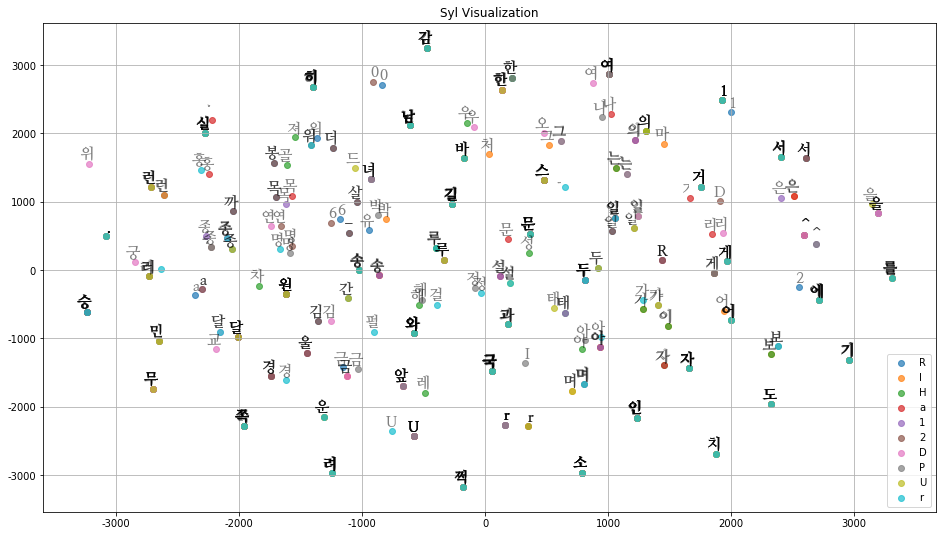

In [116]:
m1 = Model()
m1.set_model(syl_model, 5, 'pca', 3500, 32)
tsne_plot_similar_words('Syl Visualization', keys, m1, 0.7, 'syl.png')

/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


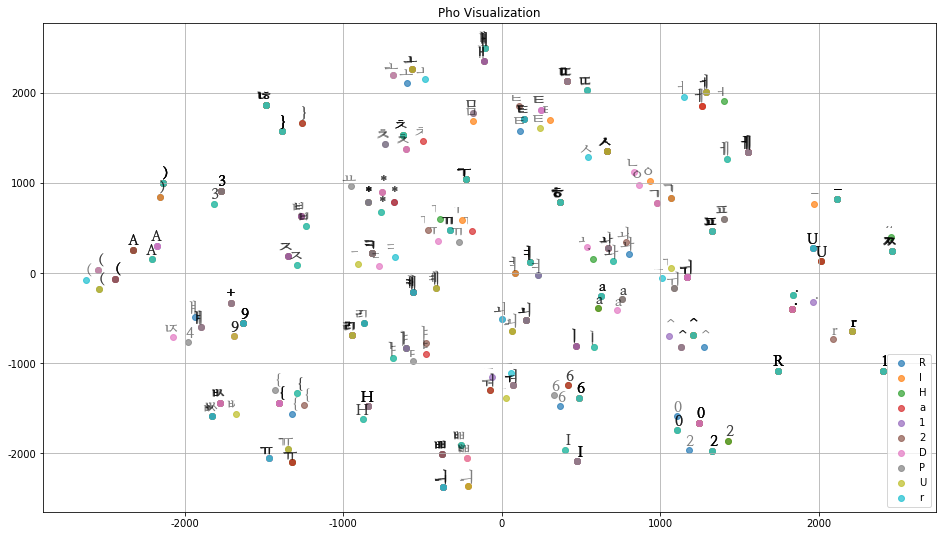

In [117]:
m2 = Model()
m2.set_model(pho_model, 15, 'pca', 3500, 32)
tsne_plot_similar_words('Pho Visualization', keys, m2, 0.7, 'pho.png')

# FastText

In [129]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.rand(10000, 256, device=device)
    y = x.to(device)
    print(x[0:5, 0:5])
    print(y.to("cpu", torch.double)[0:5, 0:5])

tensor([[0.3814, 0.5540, 0.6787, 0.9566, 0.8367],
        [0.0832, 0.5119, 0.5329, 0.4243, 0.1946],
        [0.4883, 0.5835, 0.5549, 0.9504, 0.8032],
        [0.4864, 0.9290, 0.8504, 0.9817, 0.8581],
        [0.9183, 0.7367, 0.5935, 0.8737, 0.4470]], device='cuda:0')
tensor([[0.3814, 0.5540, 0.6787, 0.9566, 0.8367],
        [0.0832, 0.5119, 0.5329, 0.4243, 0.1946],
        [0.4883, 0.5835, 0.5549, 0.9504, 0.8032],
        [0.4864, 0.9290, 0.8504, 0.9817, 0.8581],
        [0.9183, 0.7367, 0.5935, 0.8737, 0.4470]], dtype=torch.float64)


In [130]:
from gensim.models import FastText
import pandas as pd

In [131]:
#ft = FastText(size=100, window=3, min_count=1)

ft = FastText(size=100)

ft.build_vocab(sentences=utterances)

In [132]:
ft.train(sentences=utterances, epochs=50, total_examples=len(utterances),
         total_words=ft.corpus_total_words
)
print(len(utterances))
ft.save('ft')

471


In [133]:
print("R" in ft.wv.vocab)

True


307
[-0.17641968]


/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


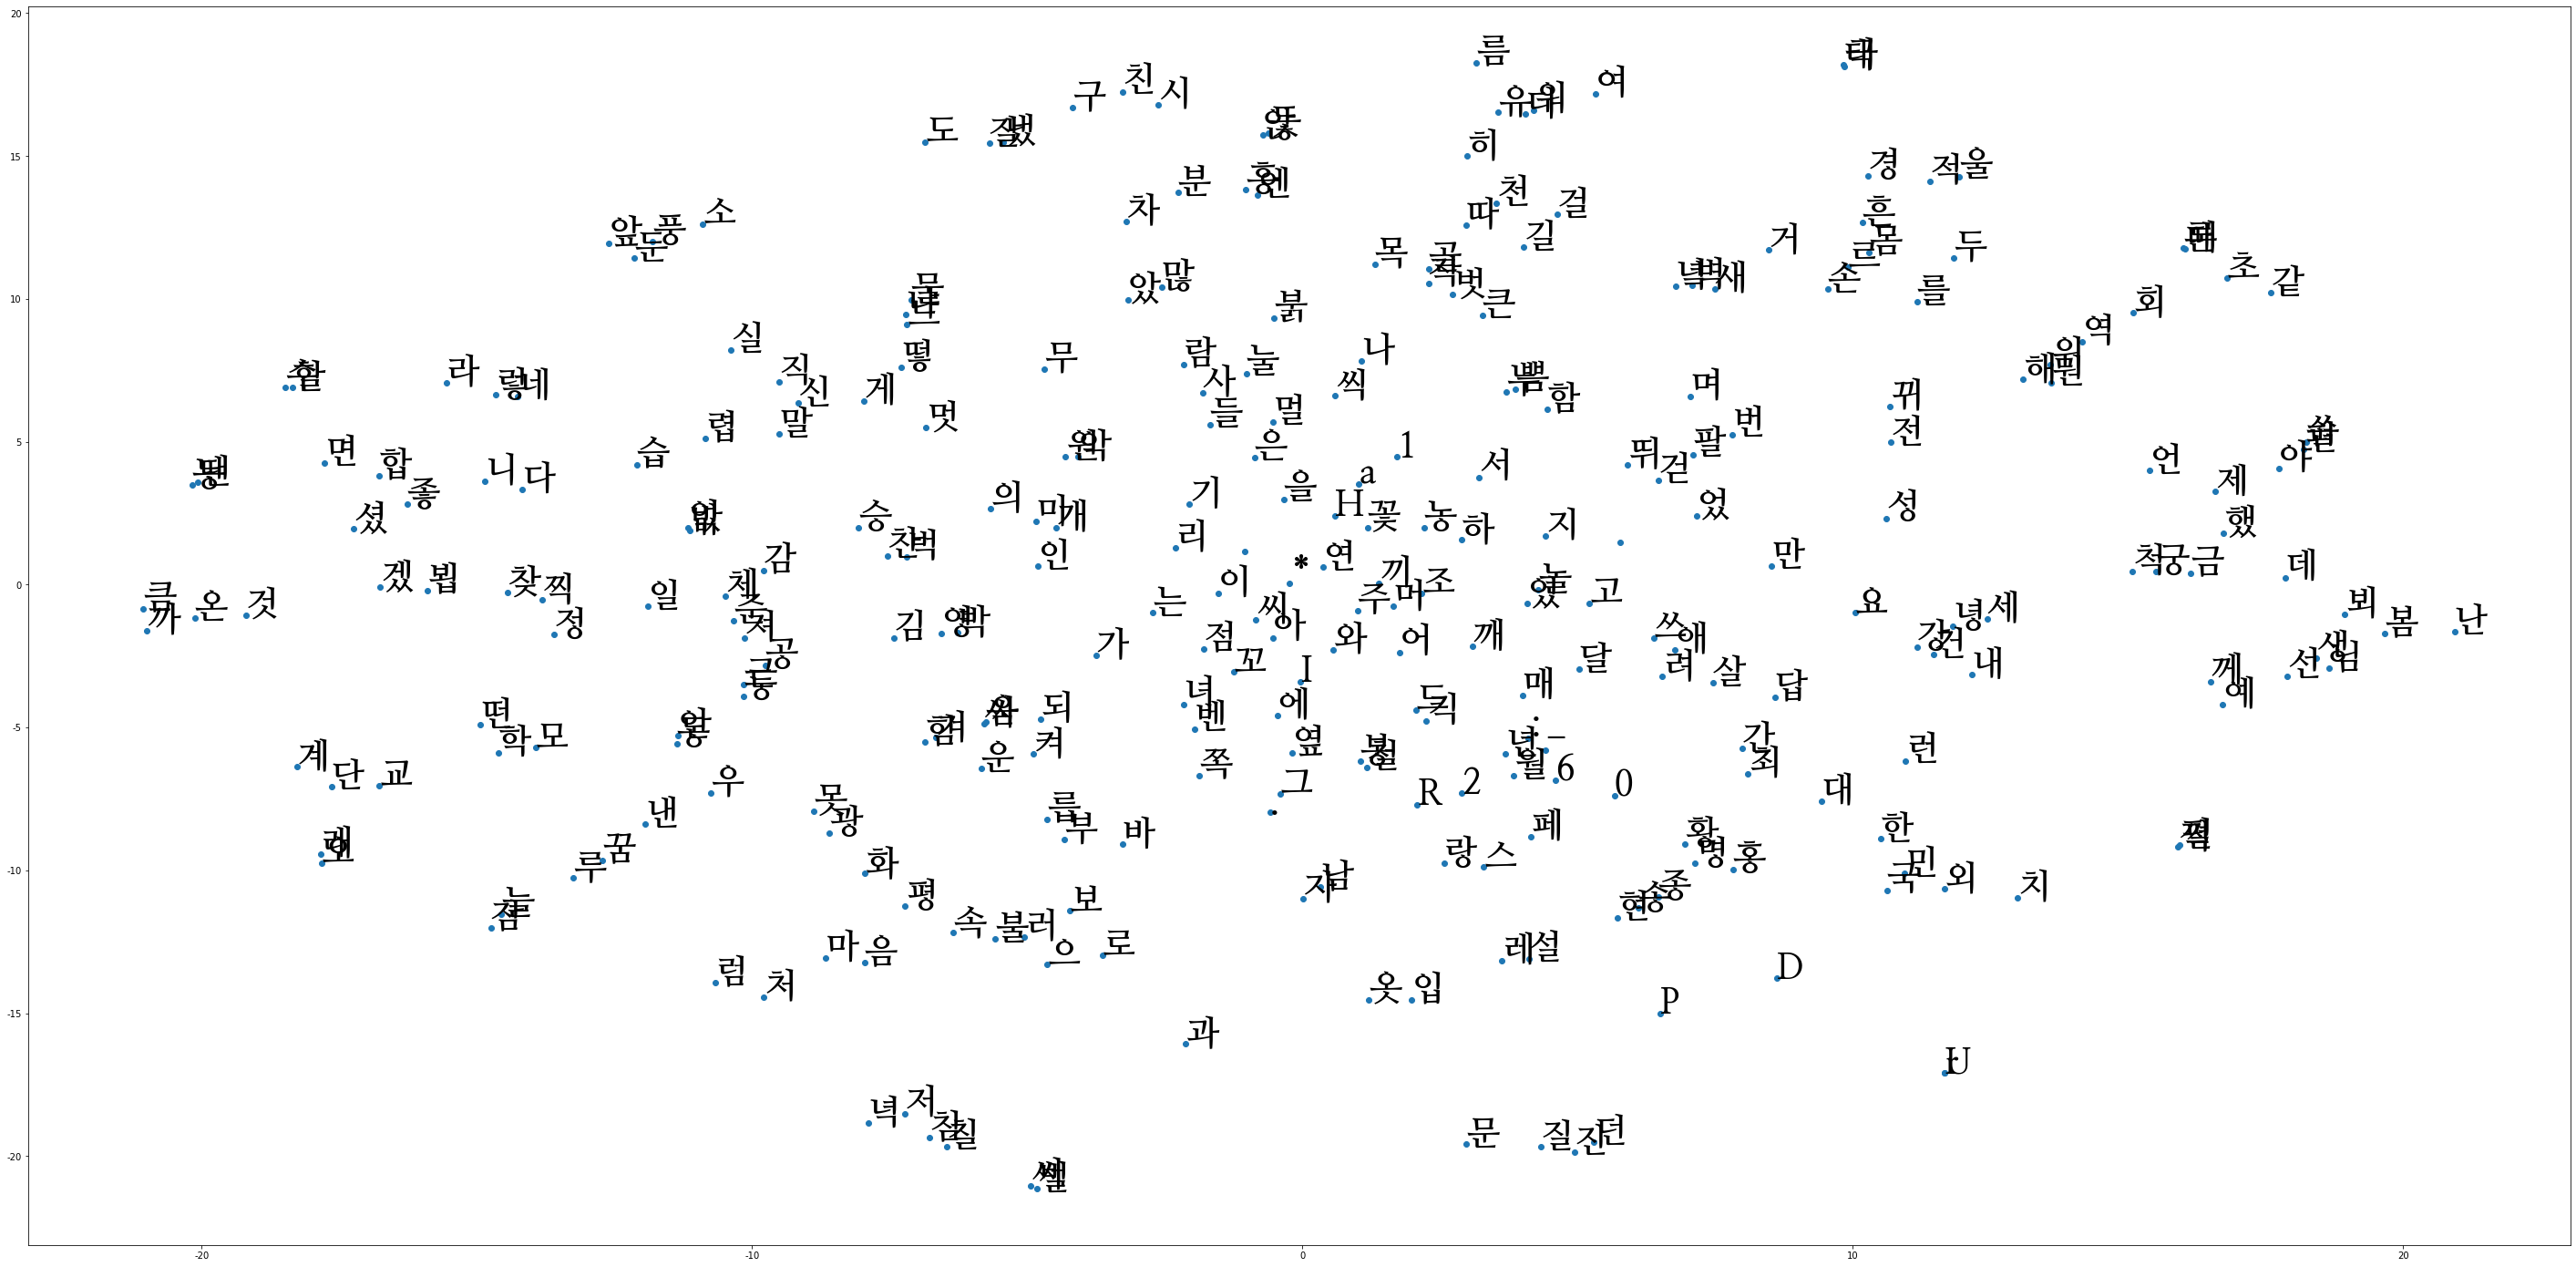

In [134]:
#vocab = list(model.wv.vocab)#단어들만 선정

vocab = list(ft.wv.index2entity)#빈도수로 선정
X = ft[vocab]

print(len(X))
print(X[0][:1])
tsne = TSNE(n_components=2)

# 시각화할 단어 개수 설정
X_tsne = tsne.fit_transform(X[:300,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])

%matplotlib inline

fig = plt.figure()
fig.set_size_inches(50, 25)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=38, fontproperties=prop)
plt.show()

# FastText 제외 Glove넣기
# Skip-gram이랑 CBOW 둘 다 시험해보기